# make plot CuT 1e-9 ENT=1e-8

In [1]:
% housekeeping
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt(1:n-12);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cu_EN']; addpath(Cumodelspath);

In [2]:
% set constants

pHv=2:0.25:10.5; CuT=1e-9; ENT=1e-8;

In [3]:
% make model with higher resolutions so plot line is smooth

% MODEL FOR COMPARISON
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

inorganicTOTALS=[CuT ENT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;

for i=1:length(pHv);
    pH=pHv(i); pe=20.75-pH; PCO2=10^-3.5;
    [Cuall(i),CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2open_EN_allsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
end


In [4]:
% experimental data

pH1=[10.001 8.054 7.042 6.103 4.014 2.061];
logCuA1=[-11.1216	-10.1892	-10.2331	-10.1824	-9.55743	 -9];
logCuB1=[-15.9493	-13.0236	-11.4932	-10.1216	-9.28041	 -9];
logCumodel1=[-16.0073	-10.2666	-9.22324	-9.01983	-9.00014	-9]

logCumodel1,1,2,3,4,5,6
1,-16.0073,-10.2666,-9.22324,-9.01983,-9.00014,-9


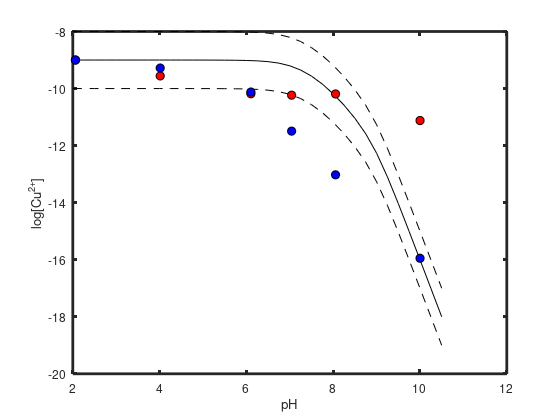

In [5]:
% make plot

plot(pHv,log10(Cuall),'k-', pHv,log10(Cuall*10),'k--', pHv,log10(Cuall./10),'k--')
hold on
plot(pH1,logCuA1,'ko','markerfacecolor','r')
plot(pH1,logCuB1,'ko','markerfacecolor','b')
xlabel('pH'); ylabel('log[Cu^{2+}]')
set(gca,'linewidth',2,'fontsize',12)

In [6]:
pH1
logCuA1
logCuB1

pHv'
log10(Cuall)

pH1,1,2,3,4,5,6
1,10.001,8.054,7.042,6.103,4.014,2.061


logCuA1,1,2,3,4,5,6
1,-11.1216,-10.1892,-10.2331,-10.1824,-9.55743,-9


logCuB1,1,2,3,4,5,6
1,-15.9493,-13.0236,-11.4932,-10.1216,-9.28041,-9


ans,1
1,2
2,2.25
3,2.5
4,2.75
5,3
6,3.25
7,3.5
8,3.75
9,4
10,4.25


ans,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
1,-9,-9,-9,-9.00001,-9.00001,-9.00002,-9.00004,-9.00007,-9.00013,-9.00023,-9.00042,-9.00075,-9.00134,-9.00241,-9.00438,-9.00808,-9.01519,-9.02916,-9.05671,-9.10931,-9.20248,-9.35117,-9.56437,-9.84367,-10.1852,-10.5838,-11.0421,-11.5862,-12.2664,-13.0992,-14.0329,-15.0104,-16.0033,-17.001,-18.0003
